In [106]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 14 13:25:52 2023

@author: anitha
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime


data = pd.read_csv("Data/sensorread1001.csv")
data

,id,src_id,company_id,sub_process_id,timestamp_utc,total_kwh,total_system_power_demand,total_system_power_demand_max,process_id,equipment_id,total_system_power,is_obsolete_data,nonaggs_reading
0,59168940,1001-09-00-04,1001,0,2023-01-26 08:44:00+00:00,15395.090,0.249901,3.279461,9,4,0.249901,False,NaN
1,59168920,1001-01-02-01,1001,2,2023-01-26 08:44:00+00:00,1029997.560,0.000000,278.515100,1,1,0.000000,False,NaN
2,59168857,1001-05-04-01,1001,4,2023-01-26 08:44:00+00:00,391253.120,0.000000,187.350980,5,1,0.000000,False,NaN
3,59168872,1001-11-00-01,1001,0,2023-01-26 08:44:00+00:00,382629.380,18.423970,70.017555,11,1,18.423970,False,NaN
4,59168891,1001-09-00-03,1001,0,2023-01-26 08:44:00+00:00,34021.004,3.674393,7.700803,9,3,3.674393,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,59602030,1001-09-00-01,1001,0,2023-01-27 23:58:00+00:00,1380.851,0.089745,0.092359,9,1,0.089745,False,NaN
20156,59602056,1001-01-02-01,1001,2,2023-01-27 23:58:00+00:00,1031878.750,0.000000,278.515100,1,1,0.000000,False,NaN
20157,59602076,1001-09-00-04,1001,0,2023-01-27 23:58:00+00:00,15445.626,0.259072,3.279461,9,4,0.259072,False,NaN
20158,59602080,1001-05-05-01,1001,5,2023-01-27 23:58:00+00:00,167544.470,1.121653,30.783848,5,1,1.121653,False,NaN


In [107]:
df = data.columns[data.isnull().any()].tolist()
#pd.set_option('display.max_rows', None)
df

['nonaggs_reading']

In [108]:
comid = list(data['company_id'].unique())
print(comid)

[1001]


In [109]:
eq = data['equipment_id'].value_counts()
eq

equipment_id
1    11520
2     5760
4     1440
3     1440
Name: count, dtype: int64

In [110]:
#select one equipment
df1_comp = data[data['company_id']==1001].copy()
df1_comp

,id,src_id,company_id,sub_process_id,timestamp_utc,total_kwh,total_system_power_demand,total_system_power_demand_max,process_id,equipment_id,total_system_power,is_obsolete_data,nonaggs_reading
0,59168940,1001-09-00-04,1001,0,2023-01-26 08:44:00+00:00,15395.090,0.249901,3.279461,9,4,0.249901,False,NaN
1,59168920,1001-01-02-01,1001,2,2023-01-26 08:44:00+00:00,1029997.560,0.000000,278.515100,1,1,0.000000,False,NaN
2,59168857,1001-05-04-01,1001,4,2023-01-26 08:44:00+00:00,391253.120,0.000000,187.350980,5,1,0.000000,False,NaN
3,59168872,1001-11-00-01,1001,0,2023-01-26 08:44:00+00:00,382629.380,18.423970,70.017555,11,1,18.423970,False,NaN
4,59168891,1001-09-00-03,1001,0,2023-01-26 08:44:00+00:00,34021.004,3.674393,7.700803,9,3,3.674393,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,59602030,1001-09-00-01,1001,0,2023-01-27 23:58:00+00:00,1380.851,0.089745,0.092359,9,1,0.089745,False,NaN
20156,59602056,1001-01-02-01,1001,2,2023-01-27 23:58:00+00:00,1031878.750,0.000000,278.515100,1,1,0.000000,False,NaN
20157,59602076,1001-09-00-04,1001,0,2023-01-27 23:58:00+00:00,15445.626,0.259072,3.279461,9,4,0.259072,False,NaN
20158,59602080,1001-05-05-01,1001,5,2023-01-27 23:58:00+00:00,167544.470,1.121653,30.783848,5,1,1.121653,False,NaN


In [111]:
pro_id = list(df1_comp['process_id'].unique())
print(pro_id)

[9, 1, 5, 11, 3, 2]


In [112]:
df1 = df1_comp.groupby(['company_id', 'process_id', 'sub_process_id','equipment_id'])
df1.first()

id         src_id  \
company_id process_id sub_process_id equipment_id                            
1001       1          2              1             59168920  1001-01-02-01   
           2          7              1             59169218  1001-02-07-01   
           3          1              1             59169158  1001-03-01-01   
                                     2             59169066  1001-03-01-02   
           5          1              1             59174544  1001-05-01-01   
                      4              1             59168857  1001-05-04-01   
                                     2             59169160  1001-05-04-02   
                      5              1             59168944  1001-05-05-01   
                                     2             59168999  1001-05-05-02   
           9          0              1             59168894  1001-09-00-01   
                                     3             59168891  1001-09-00-03   
                                     4             59168940  1001-09-00-04   
           11         0              1             59168872  1001-11-00-01   
                                     2             59168992  1001-11-00-02   

                                                               timestamp_utc  \
company_id process_id sub_process_id equipment_id                              
1001       1          2              1             2023-01-26 08:44:00+00:00   
           2          7              1             2023-01-26 08:46:00+00:00   
           3          1              1             2023-01-26 08:46:00+00:00   
                                     2             2023-01-26 08:46:00+00:00   
           5          1              1             2023-01-26 09:16:00+00:00   
                      4              1             2023-01-26 08:44:00+00:00   
                                     2             2023-01-26 08:46:00+00:00   
                      5              1             2023-01-26 08:44:00+00:00   
                                     2             2023-01-26 08:44:00+00:00   
           9          0              1             2023-01-26 08:44:00+00:00   
                                     3             2023-01-26 08:44:00+00:00   
                                     4             2023-01-26 08:44:00+00:00   
           11         0              1             2023-01-26 08:44:00+00:00   
                                     2             2023-01-26 08:44:00+00:00   

                                                      total_kwh  \
company_id process_id sub_process_id equipment_id                 
1001       1          2              1             1.029998e+06   
           2          7              1             4.022787e+05   
           3          1              1             1.985782e+05   
                                     2             4.892428e+05   
           5          1              1             6.463589e+04   
                      4              1             3.912531e+05   
                                     2             3.554951e+05   
                      5              1             1.670220e+05   
                                     2             1.338480e+05   
           9          0              1             1.377373e+03   
                                     3             3.402100e+04   
                                     4             1.539509e+04   
           11         0              1             3.826294e+05   
                                     2             2.129736e+03   

                                                   total_system_power_demand  \
company_id process_id sub_process_id equipment_id                              
1001       1          2              1                              0.000000   
           2          7              1                             36.987686   
           3          1              1                             10.197842   
                                     2                

In [113]:
df1_proc = df1_comp[df1_comp['process_id']==1].copy()
df1_proc 

,id,src_id,company_id,sub_process_id,timestamp_utc,total_kwh,total_system_power_demand,total_system_power_demand_max,process_id,equipment_id,total_system_power,is_obsolete_data,nonaggs_reading
1,59168920,1001-01-02-01,1001,2,2023-01-26 08:44:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
17,59169288,1001-01-02-01,1001,2,2023-01-26 08:46:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
35,59169656,1001-01-02-01,1001,2,2023-01-26 08:48:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
44,59170024,1001-01-02-01,1001,2,2023-01-26 08:50:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
58,59170392,1001-01-02-01,1001,2,2023-01-26 08:52:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20100,59600584,1001-01-02-01,1001,2,2023-01-27 23:50:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN
20111,59600952,1001-01-02-01,1001,2,2023-01-27 23:52:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN
20130,59601320,1001-01-02-01,1001,2,2023-01-27 23:54:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN
20146,59601688,1001-01-02-01,1001,2,2023-01-27 23:56:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN


In [114]:
sub_pro_id = list(df1_proc['sub_process_id'].unique())
print(sub_pro_id)

[2]


In [115]:
df1_sub_proc = df1_proc[df1_proc['sub_process_id']==2].copy()
df1_sub_proc 

,id,src_id,company_id,sub_process_id,timestamp_utc,total_kwh,total_system_power_demand,total_system_power_demand_max,process_id,equipment_id,total_system_power,is_obsolete_data,nonaggs_reading
1,59168920,1001-01-02-01,1001,2,2023-01-26 08:44:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
17,59169288,1001-01-02-01,1001,2,2023-01-26 08:46:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
35,59169656,1001-01-02-01,1001,2,2023-01-26 08:48:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
44,59170024,1001-01-02-01,1001,2,2023-01-26 08:50:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
58,59170392,1001-01-02-01,1001,2,2023-01-26 08:52:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20100,59600584,1001-01-02-01,1001,2,2023-01-27 23:50:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN
20111,59600952,1001-01-02-01,1001,2,2023-01-27 23:52:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN
20130,59601320,1001-01-02-01,1001,2,2023-01-27 23:54:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN
20146,59601688,1001-01-02-01,1001,2,2023-01-27 23:56:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN


In [116]:
eq_id = list(df1_sub_proc['equipment_id'].unique())
print(eq_id)

[1]


In [117]:
df1_eqment = df1_sub_proc[df1_proc['equipment_id']==1].copy()
df1_eqment

,id,src_id,company_id,sub_process_id,timestamp_utc,total_kwh,total_system_power_demand,total_system_power_demand_max,process_id,equipment_id,total_system_power,is_obsolete_data,nonaggs_reading
1,59168920,1001-01-02-01,1001,2,2023-01-26 08:44:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
17,59169288,1001-01-02-01,1001,2,2023-01-26 08:46:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
35,59169656,1001-01-02-01,1001,2,2023-01-26 08:48:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
44,59170024,1001-01-02-01,1001,2,2023-01-26 08:50:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
58,59170392,1001-01-02-01,1001,2,2023-01-26 08:52:00+00:00,1029997.56,0.0,278.5151,1,1,0.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20100,59600584,1001-01-02-01,1001,2,2023-01-27 23:50:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN
20111,59600952,1001-01-02-01,1001,2,2023-01-27 23:52:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN
20130,59601320,1001-01-02-01,1001,2,2023-01-27 23:54:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN
20146,59601688,1001-01-02-01,1001,2,2023-01-27 23:56:00+00:00,1031878.75,0.0,278.5151,1,1,0.0,False,NaN


In [118]:
#select only the required column
df_clean = df1_eqment.iloc[:,[4,10]].copy()
print(df_clean)

                   timestamp_utc  total_system_power
1      2023-01-26 08:44:00+00:00                 0.0
17     2023-01-26 08:46:00+00:00                 0.0
35     2023-01-26 08:48:00+00:00                 0.0
44     2023-01-26 08:50:00+00:00                 0.0
58     2023-01-26 08:52:00+00:00                 0.0
...                          ...                 ...
20100  2023-01-27 23:50:00+00:00                 0.0
20111  2023-01-27 23:52:00+00:00                 0.0
20130  2023-01-27 23:54:00+00:00                 0.0
20146  2023-01-27 23:56:00+00:00                 0.0
20156  2023-01-27 23:58:00+00:00                 0.0

[1440 rows x 2 columns]


<Axes: >

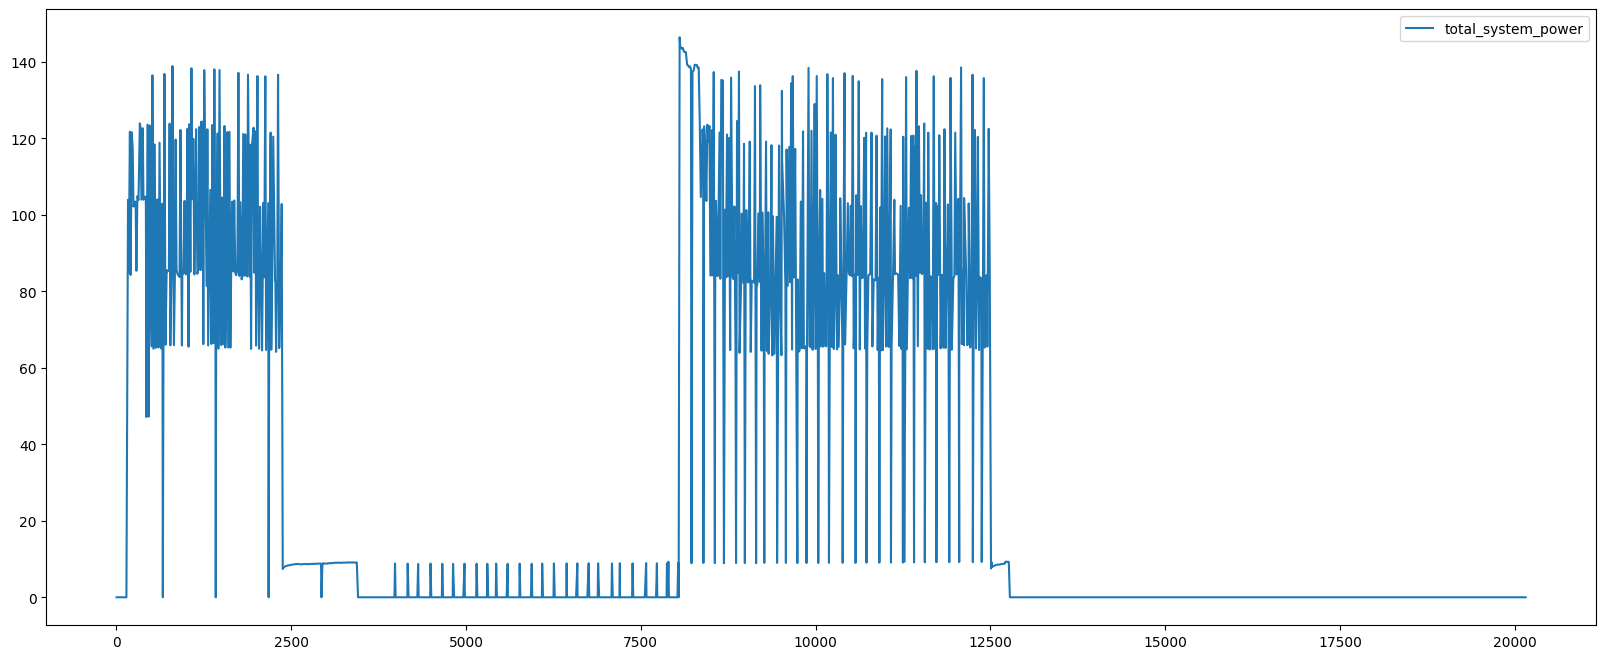

In [119]:
df_clean[['timestamp_utc','total_system_power']].plot(label='RELIANCE',
                                  figsize=(20, 8))

In [120]:
df_sort = df_clean.sort_values(by = 'timestamp_utc')
df_sort

,timestamp_utc,total_system_power
165,2023-01-26 00:00:00+00:00,103.960045
175,2023-01-26 00:02:00+00:00,84.995620
192,2023-01-26 00:04:00+00:00,121.739456
202,2023-01-26 00:06:00+00:00,84.282760
218,2023-01-26 00:08:00+00:00,121.596460
...,...,...
20100,2023-01-27 23:50:00+00:00,0.000000
20111,2023-01-27 23:52:00+00:00,0.000000
20130,2023-01-27 23:54:00+00:00,0.000000
20146,2023-01-27 23:56:00+00:00,0.000000


/var/folders/y9/kzh00ysx0cl0fd_lkcz27c_00000gn/T/ipykernel_53989/192969246.py:1: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S%z format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_sort.index = pd.to_datetime(df_sort.timestamp_utc, dayfirst=True)


(array([19383.  , 19383.25, 19383.5 , 19383.75, 19384.  , 19384.25,
        19384.5 , 19384.75, 19385.  ]),
 [Text(19383.0, 0, '01-26 00'),
  Text(19383.25, 0, '01-26 06'),
  Text(19383.5, 0, '01-26 12'),
  Text(19383.75, 0, '01-26 18'),
  Text(19384.0, 0, '01-27 00'),
  Text(19384.25, 0, '01-27 06'),
  Text(19384.5, 0, '01-27 12'),
  Text(19384.75, 0, '01-27 18'),
  Text(19385.0, 0, '01-28 00')])

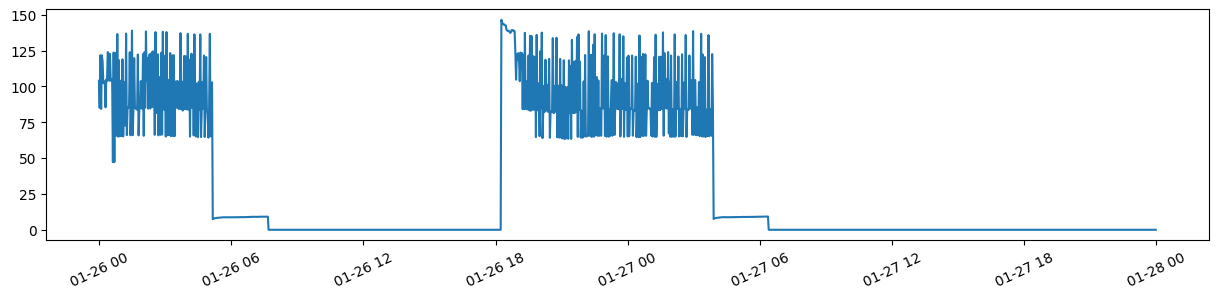

In [121]:
df_sort.index = pd.to_datetime(df_sort.timestamp_utc, dayfirst=True)
df_sort
plt.plot('total_system_power', data=df_sort)
plt.xticks( rotation=25 )

In [122]:
#df_sort[['timestamp_utc','total_system_power']].plot(label='RELIANCE',
                                  #figsize=(20, 8))

In [123]:
des_data=df_sort.describe()
des_data

,total_system_power
count,1440.000000
mean,30.386852
std,45.760052
min,0.000000
25%,0.000000
50%,0.000000
75%,65.723215
max,146.454700


<Axes: xlabel='timestamp_utc'>

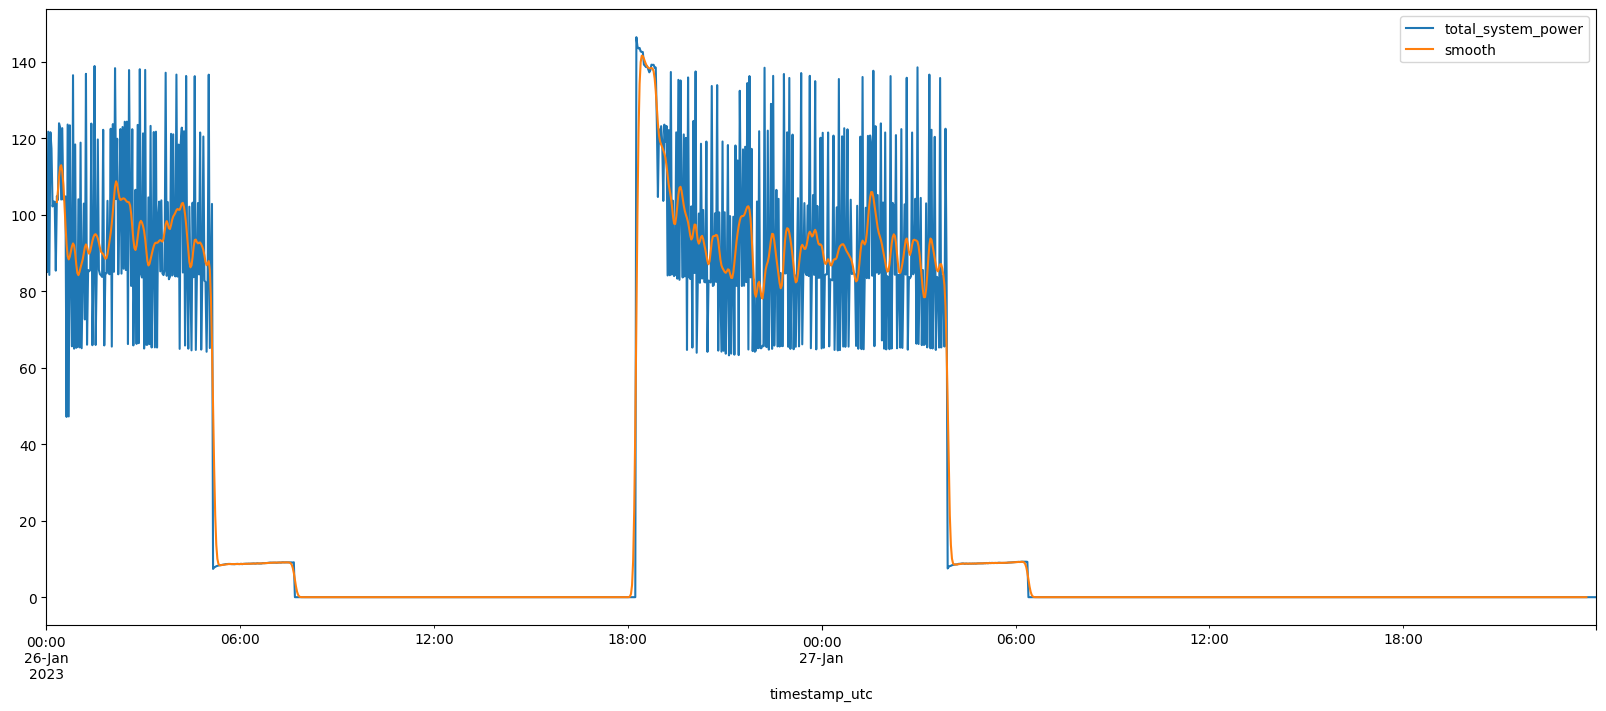

In [124]:
df_sort['smooth'] = df_sort['total_system_power'].rolling(window=20, win_type='gaussian', center=True).mean(std=2)
df_sort['smooth']

df_sort[['total_system_power', 'smooth']].plot(label='RELIANCE',
                                  figsize=(20, 8))

In [125]:
df_sort

,timestamp_utc,total_system_power,smooth
timestamp_utc,,,
2023-01-26 00:00:00+00:00,2023-01-26 00:00:00+00:00,103.960045,NaN
2023-01-26 00:02:00+00:00,2023-01-26 00:02:00+00:00,84.995620,NaN
2023-01-26 00:04:00+00:00,2023-01-26 00:04:00+00:00,121.739456,NaN
2023-01-26 00:06:00+00:00,2023-01-26 00:06:00+00:00,84.282760,NaN
2023-01-26 00:08:00+00:00,2023-01-26 00:08:00+00:00,121.596460,NaN
...,...,...,...
2023-01-27 23:50:00+00:00,2023-01-27 23:50:00+00:00,0.000000,NaN
2023-01-27 23:52:00+00:00,2023-01-27 23:52:00+00:00,0.000000,NaN
2023-01-27 23:54:00+00:00,2023-01-27 23:54:00+00:00,0.000000,NaN


In [126]:
new_data=df_sort.dropna().copy()
new_data

,timestamp_utc,total_system_power,smooth
timestamp_utc,,,
2023-01-26 00:20:00+00:00,2023-01-26 00:20:00+00:00,104.880165,103.338524
2023-01-26 00:22:00+00:00,2023-01-26 00:22:00+00:00,103.913440,106.343372
2023-01-26 00:24:00+00:00,2023-01-26 00:24:00+00:00,123.934654,109.886044
2023-01-26 00:26:00+00:00,2023-01-26 00:26:00+00:00,122.879190,112.417927
2023-01-26 00:28:00+00:00,2023-01-26 00:28:00+00:00,104.000080,112.978212
...,...,...,...
2023-01-27 23:32:00+00:00,2023-01-27 23:32:00+00:00,0.000000,0.000000
2023-01-27 23:34:00+00:00,2023-01-27 23:34:00+00:00,0.000000,0.000000
2023-01-27 23:36:00+00:00,2023-01-27 23:36:00+00:00,0.000000,0.000000


In [127]:
#new_data.to_csv("/Volumes/Projects/DAZOQ-internship/one_sensor2_5_1.csv", index=False)

In [140]:
#pd.to_numeric(df["a"])
X = new_data[['smooth']].values
print(X)
model = hmm.GaussianHMM(n_components = 2, algorithm='viterbi', covariance_type = "full", n_iter = 10, random_state = 7)
#spherical
y = model.fit(X)

Z = model.predict(X)

states = pd.unique(Z)

new_data['cluster'] = Z
new_data


total = len(Z)
for c in states:
    n_examples = len(Z[Z==c])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (c, n_examples, total, percent))


print("GROUP",Z)
print("TRANS",model.transmat_)
print("PROB",model.startprob_)

[[103.33852363]
 [106.34337228]
 [109.88604393]
 ...
 [  0.        ]
 [  0.        ]
 [  0.        ]]
> Class=0 : 442/1421 (31.1%)
> Class=1 : 979/1421 (68.9%)
GROUP [0 0 0 ... 1 1 1]
TRANS [[0.99547501 0.00452499]
 [0.00102248 0.99897752]]
PROB [1. 0.]


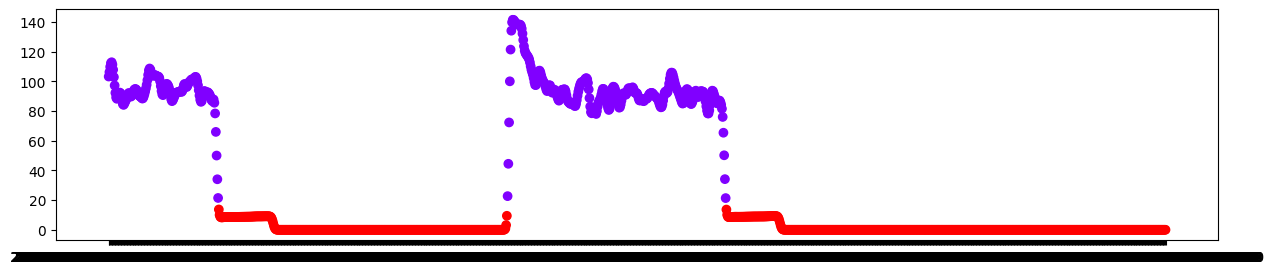

In [141]:
plt.plot(figsize=(20, 50))
plt.scatter(new_data['timestamp_utc'],new_data['smooth'],c=new_data['cluster'], cmap= 'rainbow')

In [92]:
new_data

,timestamp_utc,total_system_power,smooth,cluster
timestamp_utc,,,,
2023-01-26 00:20:00+00:00,2023-01-26 00:20:00+00:00,104.880165,103.338524,2
2023-01-26 00:22:00+00:00,2023-01-26 00:22:00+00:00,103.913440,106.343372,2
2023-01-26 00:24:00+00:00,2023-01-26 00:24:00+00:00,123.934654,109.886044,2
2023-01-26 00:26:00+00:00,2023-01-26 00:26:00+00:00,122.879190,112.417927,2
2023-01-26 00:28:00+00:00,2023-01-26 00:28:00+00:00,104.000080,112.978212,2
...,...,...,...,...
2023-01-27 23:32:00+00:00,2023-01-27 23:32:00+00:00,0.000000,0.000000,0
2023-01-27 23:34:00+00:00,2023-01-27 23:34:00+00:00,0.000000,0.000000,0
2023-01-27 23:36:00+00:00,2023-01-27 23:36:00+00:00,0.000000,0.000000,0


In [93]:
new_data.to_csv("Data/cluster_result.csv", index=False)

In [94]:
df_test = pd.read_csv("Data/one_sensor2_5_1.csv")
df_test

,timestamp_utc,total_system_power,smooth
0,2023-01-25 00:20:00+00:00,0.0,0.0
1,2023-01-25 00:22:00+00:00,0.0,0.0
2,2023-01-25 00:24:00+00:00,0.0,0.0
3,2023-01-25 00:26:00+00:00,0.0,0.0
4,2023-01-25 00:28:00+00:00,0.0,0.0
...,...,...,...
1416,2023-01-26 23:32:00+00:00,0.0,0.0
1417,2023-01-26 23:34:00+00:00,0.0,0.0
1418,2023-01-26 23:36:00+00:00,0.0,0.0
1419,2023-01-26 23:38:00+00:00,0.0,0.0


In [95]:
df_remove_nan = df_sort.dropna().copy()

In [96]:
test_x = new_data['smooth'].values
test_x

array([103.33852363, 106.34337228, 109.88604393, ...,   0.        ,
         0.        ,   0.        ])

(array([19383.  , 19383.25, 19383.5 , 19383.75, 19384.  , 19384.25,
        19384.5 , 19384.75, 19385.  ]),
 [Text(19383.0, 0, '01-26 00'),
  Text(19383.25, 0, '01-26 06'),
  Text(19383.5, 0, '01-26 12'),
  Text(19383.75, 0, '01-26 18'),
  Text(19384.0, 0, '01-27 00'),
  Text(19384.25, 0, '01-27 06'),
  Text(19384.5, 0, '01-27 12'),
  Text(19384.75, 0, '01-27 18'),
  Text(19385.0, 0, '01-28 00')])

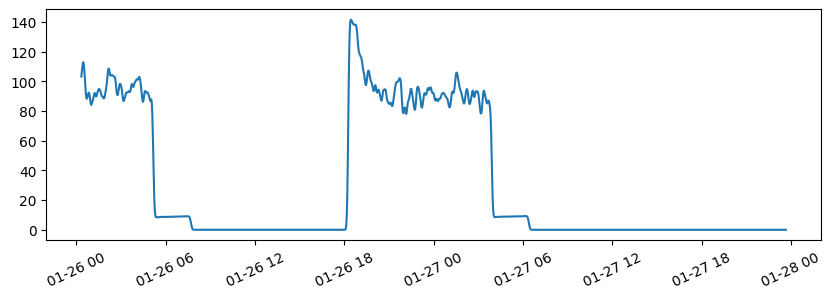

In [97]:
plt.plot('smooth', data=df_sort)
plt.xticks( rotation=25 )

In [98]:
c = model.predict(test_x.reshape(-1, 1))
c

import numpy as np

states = pd.unique(c)

df_test['cluster'] = c
df_test


total = len(c)
for Z in states:
    n_examples = len(c[c==Z])
    percent = n_examples / total * 100
    print('> Class=%d : %d/%d (%.1f%%)' % (Z, n_examples, total, percent))


> Class=2 : 76/1421 (5.3%)
> Class=1 : 363/1421 (25.5%)
> Class=3 : 165/1421 (11.6%)
> Class=0 : 817/1421 (57.5%)


In [99]:
df_remove_nan['Test_cluster'] = c
df_remove_nan

,timestamp_utc,total_system_power,smooth,Test_cluster
timestamp_utc,,,,
2023-01-26 00:20:00+00:00,2023-01-26 00:20:00+00:00,104.880165,103.338524,2
2023-01-26 00:22:00+00:00,2023-01-26 00:22:00+00:00,103.913440,106.343372,2
2023-01-26 00:24:00+00:00,2023-01-26 00:24:00+00:00,123.934654,109.886044,2
2023-01-26 00:26:00+00:00,2023-01-26 00:26:00+00:00,122.879190,112.417927,2
2023-01-26 00:28:00+00:00,2023-01-26 00:28:00+00:00,104.000080,112.978212,2
...,...,...,...,...
2023-01-27 23:32:00+00:00,2023-01-27 23:32:00+00:00,0.000000,0.000000,0
2023-01-27 23:34:00+00:00,2023-01-27 23:34:00+00:00,0.000000,0.000000,0
2023-01-27 23:36:00+00:00,2023-01-27 23:36:00+00:00,0.000000,0.000000,0


AttributeError: Can only use .dt accessor with datetimelike values

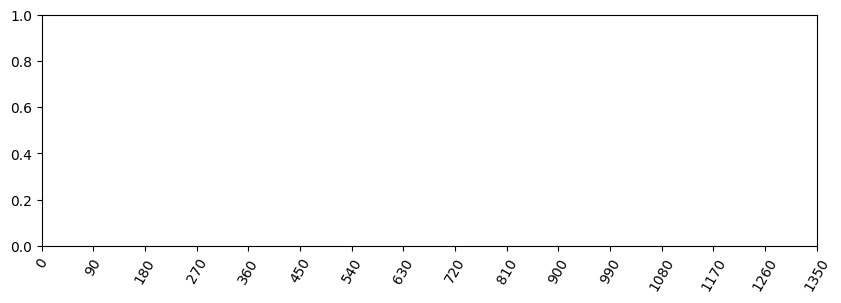

In [100]:
from datetime import datetime
#plt.xticks(np.arange(0, len(a) + 1, 5))
#plt.plot(figsize=(20, 10))
plt.rcParams.update({'figure.figsize':(10,3), 'figure.dpi':100})
plt.xticks(np.arange(0, len(df_remove_nan['timestamp_utc']) + 1, 90), rotation = 60)
plt.scatter(df_remove_nan['timestamp_utc'].dt.strftime('%d,%H:%M'),df_remove_nan['smooth'],c=df_remove_nan['Test_cluster'], cmap= 'rainbow')

In [101]:
df_remove_nan.dtypes

timestamp_utc          object
total_system_power    float64
smooth                float64
Test_cluster            int64
dtype: object

In [102]:
df_remove_nan['timestamp_utc'] = pd.to_datetime(df_remove_nan['timestamp_utc'])
df_remove_nan['timestamp_utc']
df_remove_nan.dtypes
df_remove_nan['timestamp_utc'].dt.strftime('%d,%H:%M')

timestamp_utc
2023-01-26 00:20:00+00:00    26,00:20
2023-01-26 00:22:00+00:00    26,00:22
2023-01-26 00:24:00+00:00    26,00:24
2023-01-26 00:26:00+00:00    26,00:26
2023-01-26 00:28:00+00:00    26,00:28
                               ...   
2023-01-27 23:32:00+00:00    27,23:32
2023-01-27 23:34:00+00:00    27,23:34
2023-01-27 23:36:00+00:00    27,23:36
2023-01-27 23:38:00+00:00    27,23:38
2023-01-27 23:40:00+00:00    27,23:40
Name: timestamp_utc, Length: 1421, dtype: object

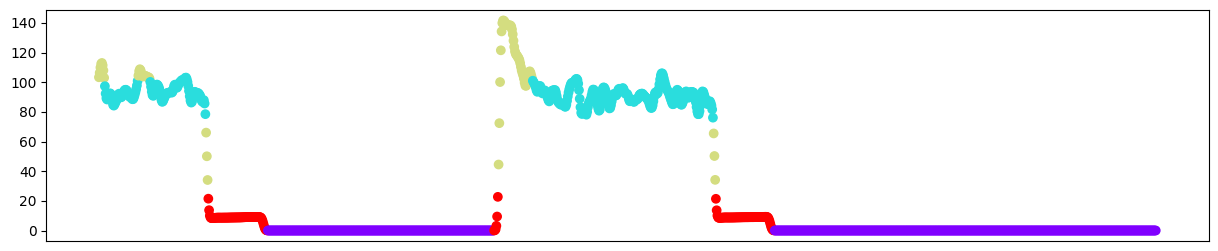

In [103]:
from datetime import datetime
#plt.xticks(np.arange(0, len(a) + 1, 5))
#plt.plot(figsize=(20, 10))
plt.rcParams.update({'figure.figsize':(15,3), 'figure.dpi':100})
plt.xticks(np.arange(0, len(df_remove_nan['timestamp_utc']) + 1, 90), rotation = 30)
plt.scatter(df_remove_nan['timestamp_utc'],df_remove_nan['smooth'],c=df_remove_nan['Test_cluster'], cmap= 'rainbow')


In [104]:
df_remove_nan.to_csv("Data/one_sensor_testresult.csv", index=False)

In [105]:
import pickle 
pickle.dump(model,open('HMM_2.pkl','wb'))

In [85]:
# this will group all 0's in one group0  10 to 30 in one group1, all higher value in group2.
"""
import pickle
pickle.dump(model,open('HMM_1.pkl','wb'))
"""


In [38]:
#this will have 4 group 0's and above 0 to 40 group1 and all higher in group2 and some steady value group3
"""
import pickle
pickle.dump(model,open('HMM_3.pkl','wb'))

"""
